In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-14 17:52:38.323349: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 17:52:38.326005: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 17:52:38.359746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 17:52:43.976108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tensor



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




In [15]:
model_dir = "/home/sheida.rahnamai/GIT/HDN/examples/Pixel_Noise/Convallaria/Contrastive_min_max/model/"
mus = np.array([])
mu_golgi = np.load(model_dir+'mu_golgi.npy')
mu_mitochondria = np.load(model_dir+'mu_mitochondria.npy')
mu_granule = np.load(model_dir+'mu_granule.npy')
print(mu_golgi.shape)
print(mu_mitochondria.shape)
print(mu_granule.shape)

(738, 160)
(1120, 160)
(1050, 160)


In [16]:

mus = np.append(mus, mu_golgi).reshape(-1, 160)
print(mus.shape)
mus = np.append(mus, mu_mitochondria).reshape(-1,160)
print(mus.shape)
mus = np.append(mus, mu_granule).reshape(-1,160)
print(mus.shape)



(738, 160)
(1858, 160)
(2908, 160)


/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 91 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sheida.rahnamai/miniconda3/envs/maester/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of 

(2908, 2)


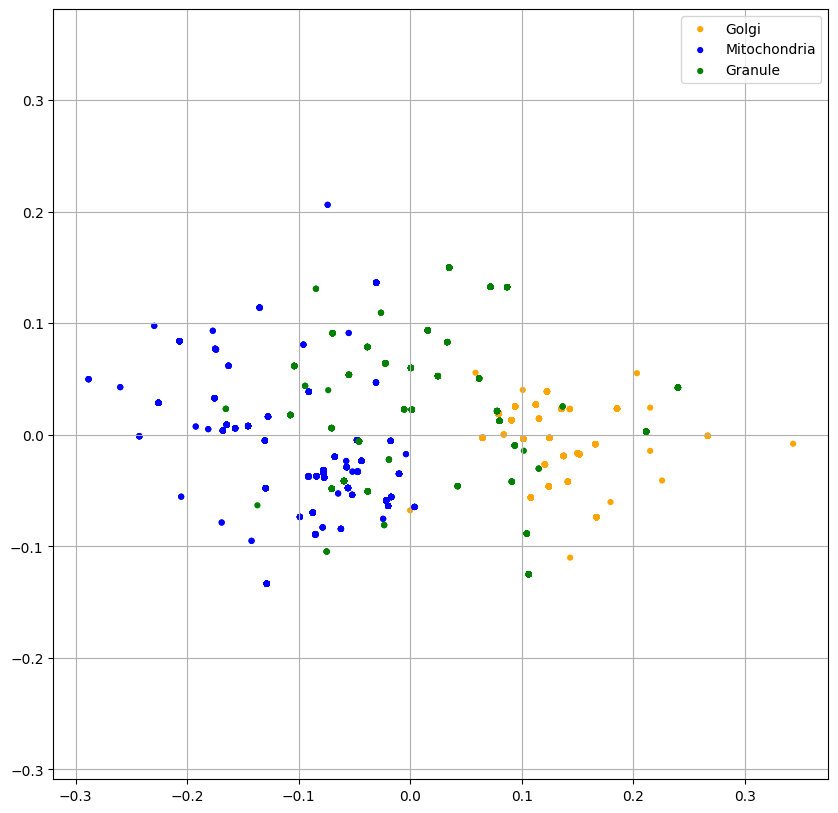

In [12]:

# reducer = umap.UMAP()
reducer = Isomap(n_components=2, metric='euclidean')
# reducer = Isomap(n_components=2, metric='cosine')
# reducer = cvae.CompressionVAE(mus)
# reducer.train()
# embedding = reducer.embed(mus)
embedding = reducer.fit_transform(mus)
print(embedding.shape)
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='orange', s=20, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='blue', s=20, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='green', s=20, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
embedding = pca.fit_transform(mus)
print(mus.shape)
print(embedding.shape)

(2908, 160)
(2908, 3)


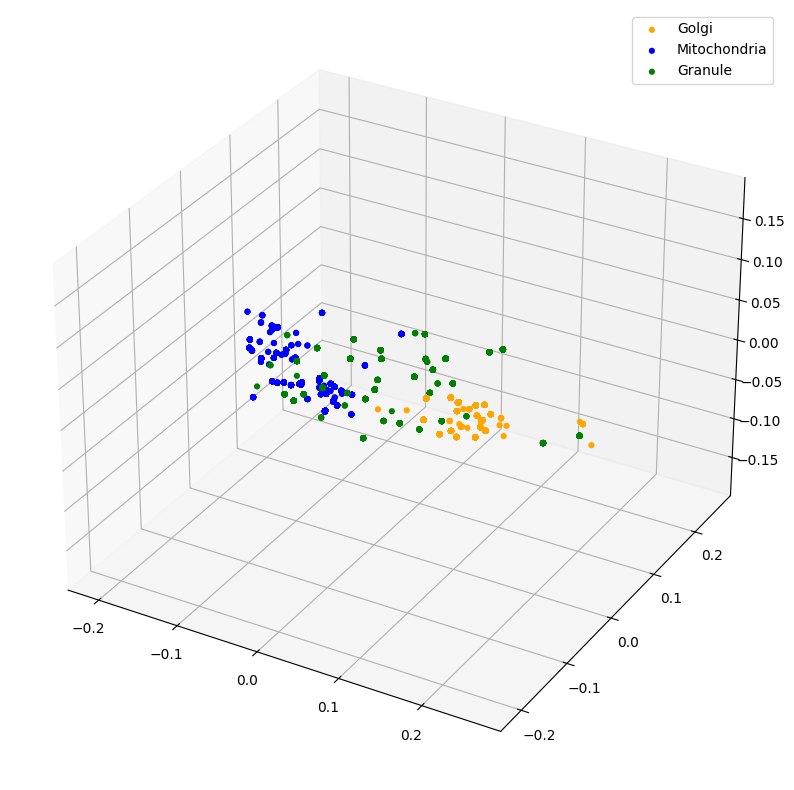

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(embedding[:738,0], embedding[:738,1], c='orange', s=20, label='Golgi', alpha=1, edgecolors='none')
ax.scatter(embedding[738:1858,0], embedding[738:1858,1], c='blue', s=20, label='Mitochondria', alpha=1, edgecolors='none')
ax.scatter(embedding[1858:,0], embedding[1858:,1], c='green', s=20, label='Granule', alpha=1, edgecolors='none')


ax.legend()
ax.grid(True)
plt.gca().set_aspect('equal', 'datalim')
plt.show()